In [15]:
import pandas  as pd                     
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('C:/Users/ksunt/Desktop/machinLearn/classification.csv')
df.head()

,true,pred
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1


In [14]:
print (accuracy_score(df['true'], df['pred']), 
        precision_score(df['true'], df['pred']),
        recall_score(df['true'], df['pred']),
        f1_score(df['true'], df['pred']))

(0.535, 0.5584415584415584, 0.4215686274509804, 0.48044692737430167)


In [26]:
TP = df.loc[(df['true'] == 1) & (df['pred'] == 1)]
FP = df.loc[(df['true'] == 0) & (df['pred'] == 1)]
FN = df.loc[(df['true'] == 1) & (df['pred'] == 0)]
TN = df.loc[(df['true'] == 0) & (df['pred'] == 0)]
print( TP['true'].count(), FP['true'].count(), FN['true'].count(), TN['true'].count())

(43, 34, 59, 64)


In [33]:
from sklearn.metrics import roc_auc_score

df = pd.read_csv('C:/Users/ksunt/Desktop/machinLearn/scores.csv')

print(roc_auc_score(df['true'], df['score_logreg']),
     roc_auc_score(df['true'], df['score_svm']),
     roc_auc_score(df['true'], df['score_knn']),
     roc_auc_score(df['true'], df['score_tree'])
     )
df.head()

(0.719187675070028, 0.7086834733893557, 0.6351540616246498, 0.6919267707082833)


,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263


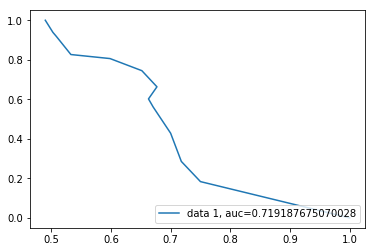

In [61]:
from sklearn.metrics import precision_recall_curve         #PR-curve
precision, recall, thresholds =  precision_recall_curve(df['true'], df['score_tree'])
plt.plot(precision, recall,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

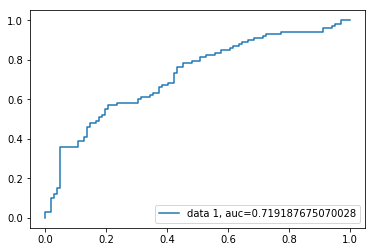

In [43]:
import matplotlib.pyplot as plt                              # ROC-curve
from sklearn.metrics import roc_curve
auc = roc_auc_score(df['true'], df['score_logreg'])
fpr, tpr, _ = roc_curve(df['true'], df['score_logreg'])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()